<a href="https://colab.research.google.com/github/Jhoang21/London-Met---Final-Year-Project---TensorFlow/blob/main/CW_Final_Project_Jamie_Hoang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----------------------------------
----------------------------------

#  ***Welcome Section / Read Me!***

----------------------------------
----------------------------------

This program is authored by Jamie Hoang. 

-

Intended for use by the said student and London Metropolian University. The purpose of this program is to be a Machine Learning Algorithm to detect steganography within files. 

-

This program is intended to be ran in code blocks starting from the top, working towards the bottom. Code can be ran via pressing on the corresponding play button next to each code block as seen in the image below.

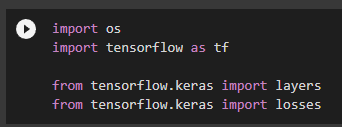

-

Each code blocks are further divided in configuable elements. Which are seperated via distinct code comments. As shown below.

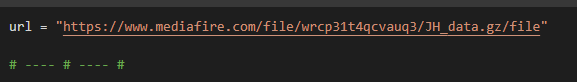

Any variables above the commented line can be modified which can alter the configuarion and operation of the program. Every code block will have an text block above it which will detail how this variable can be configured. An example of this can be seen below.

```
# [url] - This variable will be where the program attempts to download the sample data. 

- The link provided must be an http link, which must lead to an direct download. 
```

Lastly, the output of any specfic code block can be viewed under it's respective code block. As seen in the image below.

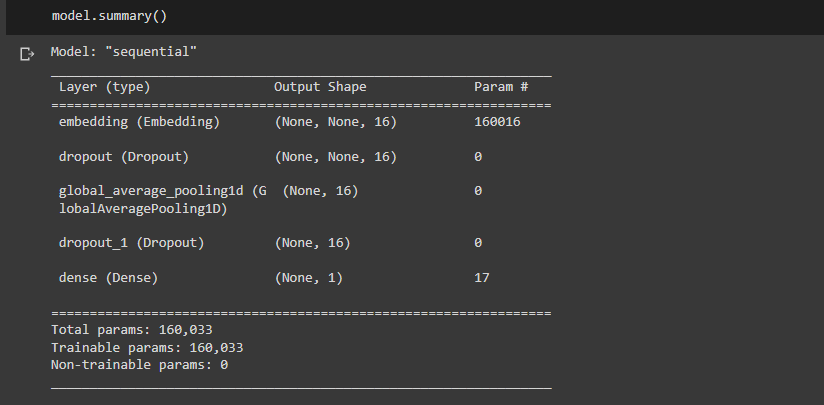




---

# ---Start of the program ---


---





---------- █ ***Library Imports*** █ ----------

This section simply imports the needed Python Libraries needed for the program.

In [ ]:
import os
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses


---------- █ ***Pulling the data.*** █ ----------

This is where the Sample Data can be downloaded from a file hosting service. 

***Note: The user can skip executing this code block, if they had uploaded their sample data personally.***

```
- Configurable Elements -

# [url] - This variable will be where the program attempts to download the sample data. 
   - The link provided must be an http link, which must lead to an direct download. 
```

In [ ]:
url = "https://www.mediafire.com/file/qlp0n7z6h8xqlev/JH_data.gz/file"

# ---- # ---- # 
# Code Section Below - DO NOT EDIT

full_dataset = tf.keras.utils.get_file("JH_data", url , untar=True, cache_dir='.', cache_subdir='')

full_dataset_dir = os.path.join(os.path.dirname(full_dataset), 'JH_data')

41230336/41217435 [==============================] - 1s 0us/step



---------- █ ***Seperating Data into sets.*** █ ----------

This section simply catagorizes the folders for the program so it can identify what each folder's intended purpose is.

```
- Configurable Elements -

# [batch_size] - Sizes of Batches (Samples are split into batches)

# [seed] - A value that used for shuffling and transformation
```

In [ ]:
batch_size = 32
seed = 42

# ---- # ---- #

rtraining_set = tf.keras.utils.text_dataset_from_directory(
    'JH_data/project_data/training_data', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='training', 
    seed=seed)

rvaildation_set = tf.keras.utils.text_dataset_from_directory(
    'JH_data/project_data/training_data', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)

#rtest_set = tf.keras.utils.text_dataset_from_directory(
#    'JH_data/project_data/test_data', 
#    batch_size=batch_size)


Found 516 files belonging to 2 classes.
Using 413 files for training.
Found 516 files belonging to 2 classes.
Using 103 files for validation.
Found 0 files belonging to 0 classes.


ValueError: ignored


---------- █ ***Processing the data.*** █ ----------

This section simply standardizes and formats the data appropirately for use by the program.

```
- Configurable Elements -

# [max_features] - The hard limit of the size of each sample

# [sequence_length] - The minimum length that a sample will be padded with addtional data 
```

In [ ]:
max_features = 10000 
sequence_length = 250

# ---- # ---- #

vectorize_layer = layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)


train_text = rtraining_set.map(lambda x, y: x)
vectorize_layer.adapt(train_text) 

def vectorize_text(text, label):
  text = tf.expand_dims(text, -1) 
  return vectorize_layer(text), label

train_ds = rtraining_set.map(vectorize_text)
val_ds = rtraining_set.map(vectorize_text)
#test_ds = rtest_set.map(vectorize_text)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
#test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)



---------- █ ***Model Creation.*** █ ----------

This section creates the model for use by the program.

```
- Configurable Elements -

# [embedding_dim] - The number of "nodes" within the neutral network
 
```

In [ ]:
embedding_dim = 16

# ---- # ---- #

model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

model.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160016    
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
__________________________________________________


---------- █ ***Model Training.*** █ ----------

This section uses the training data to bulid the model and iterate upon it.

```
- Configurable Elements -

# [epochs] - The number of rounds that the MI will iterate through the sample data
 
```

In [ ]:
epochs = 1

# ---- # ---- #

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

13/13 [==============================] - 14s 810ms/step - loss: 0.6933 - binary_accuracy: 0.4867 - val_loss: 0.6931 - val_binary_accuracy: 0.5085



---------- █ ***Model Evaluation*** █ ----------

This section uses the test data to check the accuracy of the model.



In [ ]:
#loss, accuracy = model.evaluate(test_ds)

#print("Loss: ", loss)
#print("Accuracy: ", accuracy)

---------- █ ***Model Predictions*** █ ----------

This section highlights any file within "PFolder" as possibly containing steganographic measures.  

```
- Configurable Elements -

# [threshold] - Editing this value will alter the level of suspicion it which the model will flag a vaild prediction on any files. 
  - The value assigned must be float value.
  - It cannot exceed 1, nor can be below 0
  - High values indicate, a greater confidence that the model thinks a file has steganographic measures. 
 
```

In [ ]:
threshold = 0.70

# ---- # ---- #

export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

if not os.path.exists('PFolder'):
  os.makedirs('PFolder')

path = "/content/PFolder"
files = os.listdir(path)
iii = 0

for index, file in enumerate(files):
  try:
    input = os.path.join(path, str(files[index]))
    with open (input, "r") as myfile:
      modelpredict = myfile.readlines()

    predictval = export_model.predict(modelpredict)
    predictval = predictval
    

    if predictval > threshold:
      iii+=1
      print(predictval)
      print("Prediction for: " + str(files[index]))

  except IndexError:
    continue
  except IsADirectoryError:
    continue

if iii <= 0:
  print("No Files Detected: Consider lowering Threshold")
   

No Files Detected: Consider lowering Threshold



---------- █ ***Reloading/Saving the Model .*** █ ----------

The model can be saved as a "checkpoint". Users can then personally download the specified file. As Google's service doesn't save the data permanently. The file structure can then be re-uploaded to continue from a prior state. 

In [ ]:
model.save_weights('./checkpoints/my_checkpoint')

In [ ]:
model.load_weights('./checkpoints/my_checkpoint')